# Ejercicios capítulo 2
En esta libreta se encuentran los ejercicios 2.3, 2.6, 2.9, 2.12, 2.15, 2.18, 2.21, 2.24, 2.27

In [45]:
import numpy as np
import math
import sympy as sym
import matplotlib.pyplot as mp
from math import comb, factorial, exp, sqrt
import scipy.special as sp

## Ejercicio 2.3

In [3]:
# (a) Error absoluto en f(x) = ln(x) para x = 2 y x_tilde = 1.9
x = 2
xtilde_a = 1.9
fx_a = np.log(x)
fxtilde_a = np.log(xtilde_a)
ErrorAbsoluto_a = abs(fx_a - fxtilde_a)

# (b) Error relativo en f(x) = sqrt(x) para x = 2 y x_tilde = 1.95
xtilde_b = 1.95
fx_b = np.sqrt(x)
fxtilde_b = np.sqrt(xtilde_b)
ErrorAbsoluto_b = abs(fx_b - fxtilde_b)
ErrorRelativo_b = ErrorAbsoluto_b / abs(fx_b)

# (c) Error inverso para f(x) = e^x cuando f(2) = e^2 = 8
fx_c = np.exp(2)
xtilde_c = np.log(8)
ErrorInverso_c = abs(2 - xtilde_c)

ErrorAbsoluto_a, ErrorRelativo_b, ErrorInverso_c

(0.05129329438755059, 0.012579117093425152, 0.07944154167983575)

## Ejercicio 2.6

In [9]:
# Coeficientes dados
a = 1
b = 1e8
c = 1

# (a) Cálculo de x_ usando la fórmula estándar
x_ = (-b - math.sqrt(b**2 - 4*a*c)) / (2*a)

# (b) Cálculo de x+ usando la fórmula estándar (método "malo")
xM_malo = (-b + math.sqrt(b**2 - 4*a*c)) / (2*a)

# (c) Cálculo de x+ usando el método mejorado (método "bueno")
xM_bueno = c / x_

# Mostrar resultados
print(f"x- = {x_}")
print(f"x+ (método malo) = {xM_malo}")
print(f"x+ (método bueno) = {xM_bueno}")


x- = -100000000.0
x+ (método malo) = -7.450580596923828e-09
x+ (método bueno) = -1e-08


## Ejercicio 2.12

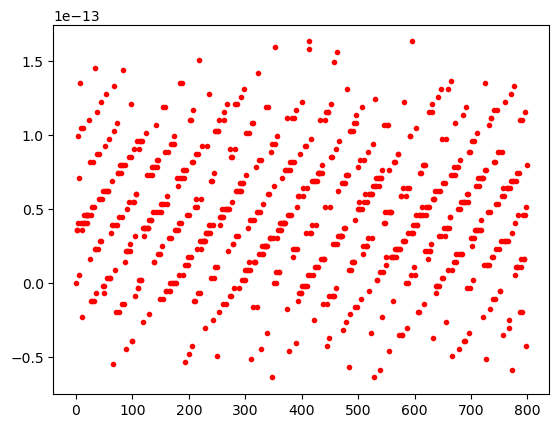

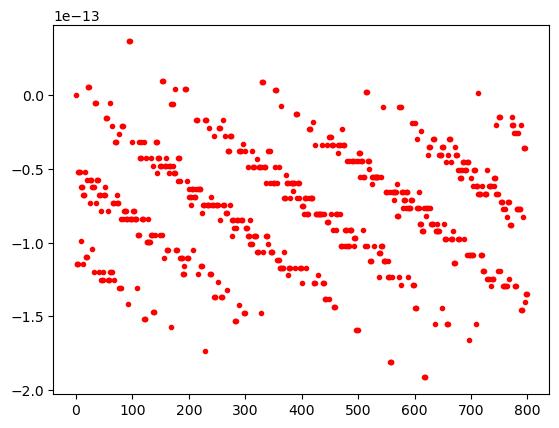

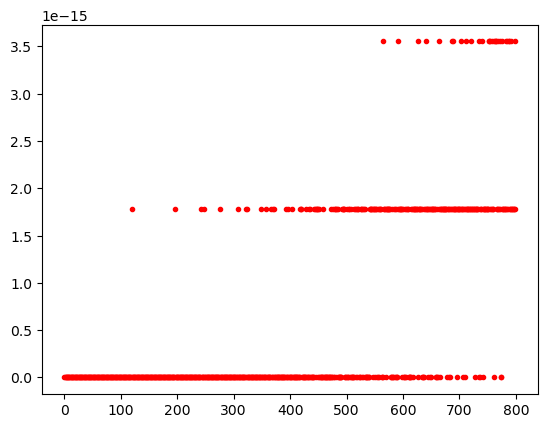

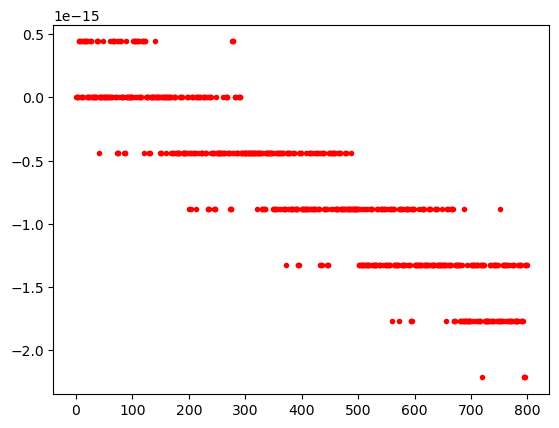

In [13]:
import matplotlib.pyplot as mp

#(a) Función racional utilizando la regla de Horner
def r(x):
    # Definimos el numerador y denominador
    A = 4*x**4 - 59*x**3 + 324*x**2 - 751*x + 622
    B = x**4 - 14*x**3 + 72*x**2 - 151*x + 112
    return A / B

# Puntos proporcionados
X = np.arange(0, 800, 1)
x1 = 1.606 + 2**-52 * X
x2 = 2.400 + 2**-52 * X

# Evaluación de la función en x1 y x2
r_x1 = r(x1)
r_x2 = r(x2)


Y1 = r_x1 - r(1.606)
mp.plot(X, Y1, 'r.')
mp.show()

Y2 = r_x2 - r(2.400)
mp.plot(X, Y2, 'r.')
mp.show()

#(b) Definimos una nueva función 
def s(x):
    C = 3*(x-2)*((x-5)**2 + 4)
    D = x + ((x-2)**2)*((x-5)**2 +3)
    return 4 - (C/D)

Y3 = s(x1) - s(1.606)
mp.plot(X, Y3, 'r.')
mp.show()

Y4 = s(x2) - s(2.400)
mp.plot(X, Y4, 'r.')
mp.show()

## Ejercicio 2.15

In [2]:
# Definimos la función de Basel

def Basel(n):
    b=0
    for i in range (1,n+1,1):
        b=b+1/i**2
    return b

print(Basel(94906000))
nmaxd=94906000

1.6449340578345162


In [4]:
#Besel en reversa
def Baselr(x):
    br=0
    for i in range (x,0,-1):
        br=br+1/i**2
    return br
nmaxr=4*nmaxd
print (Baselr(nmaxr))

1.644934064214041


In [7]:
def kahansum(x):
    s = 0.; c = 0.
    for i in range(1, x + 1):
        term = 1 / (i ** 2)
        y = term - c  # Compensa el error acumulado
        temp = s + y  # Suma compensada
        c = (temp - s) - y  # Actualiza la compensación
        s = temp  # Actualiza la suma
    return s

def s(n):
    b=0
    for i in range (1,n+1,1):
        b=b+1/i**2
        
    return b

def sumak(x):
    return kahansum(x)-s(x)
print (Basel(nmaxd))
print (Baselr(nmaxr))
print (sumak(nmaxd))
print (sumak(nmaxr))

1.6449340578345162
1.644934064214041
-1.5230312566671955e-09
6.3794660665195124e-09


## Ejercicio 2.18

In [35]:
# Función para la onda cuadrada
def square_wave(x):
    return np.where((x > 0) & (x < np.pi), 0.5, -0.5)

# Función para la expansión de Fourier
def fourier_series(x, nmax):
    sum_value = 0
    for n in range(1, nmax + 1, 2):  # Solo n impares
        sum_value += (2 / np.pi) * (np.sin(n * x) / n)
    return sum_value

nmax=5
print (square_wave(-3))
print (fourier_series(np.pi/2,1))

-0.5
0.6366197723675814


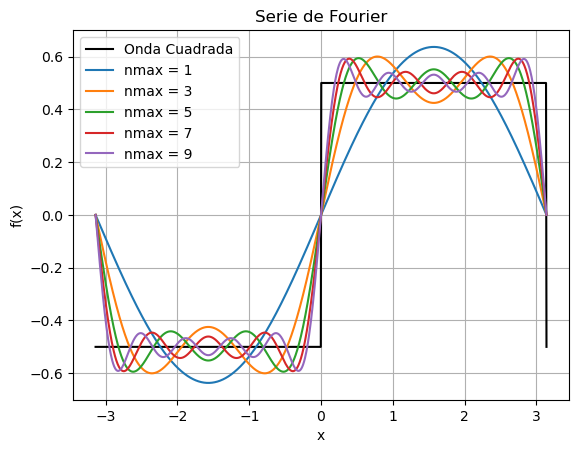

In [36]:
# Valores de nmax
nmax_values = [1, 3, 5, 7, 9]

# Graficar la onda cuadrada original
mp.plot(x, square_wave(x), label='Onda Cuadrada', color='black')

# Graficar las aproximaciones de Fourier
for nmax in nmax_values:
    mp.plot(x, fourier_series(x, nmax), label=f'nmax = {nmax}')

mp.title('Serie de Fourier')
mp.xlabel('x')
mp.ylabel('f(x)')
mp.legend()
mp.grid(True)
mp.show()


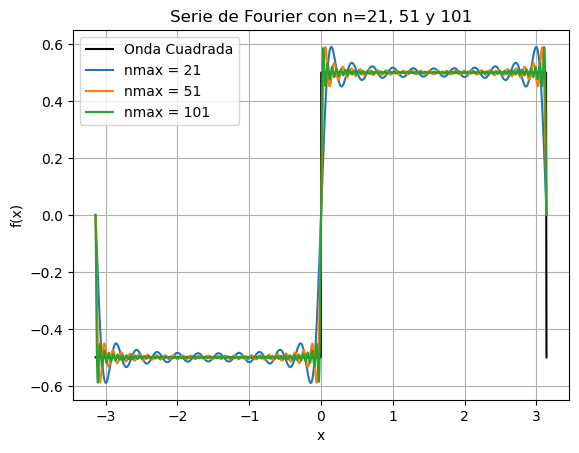

In [31]:
# Valores más grandes de nmax
nmax_large_values = [21, 51, 101]

# Graficar la onda cuadrada original
mp.plot(x, square_wave(x), label='Onda Cuadrada', color='black')

# Graficar las aproximaciones de Fourier para grandes nmax
for nmax in nmax_large_values:
    mp.plot(x, fourier_series(x, nmax), label=f'nmax = {nmax}')

mp.title('Serie de Fourier con n=21, 51 y 101')
mp.xlabel('x')
mp.ylabel('f(x)')
mp.legend()
mp.grid(True)
mp.show()

## Ejercicio 21

In [5]:
from math import comb

def bernoulli_number(n):
    # Casos base conocidos
    if n == 0:
        return 1.0  # B_0 = 1.0
    if n == 1:
        return -0.5  # B_1 = -0.5
    
    # Los números de Bernoulli para n impar (excepto n=1) son 0
    if n % 2 == 1:
        return 0.0
    
    # Cálculo por recurrencia para n par
    result = 0.0
    for k in range(n):
        result += comb(n, k) * bernoulli_number(k) / (n + 1 - k)
    
    return -result

print (bernoulli_number(20))


-529.1242423296121


In [12]:
# Definimos la variable simbólica
x = sym.Symbol("x")

# Función para calcular el polinomio de Bernoulli B_p(x)
def bernoulli_polynomial(p):
    result = 0  # Inicializar el polinomio de Bernoulli
    for m in range(p + 1):
        result += bernoulli_number(m) * comb(p, m) * x**(p - m)
    return result

# Función para calcular la suma en la fórmula de Euler-Maclaurin
def bernoulli_sum(i):
    sum_value = 0  # Inicializar la suma
    for i in range(1, i + 1):
        sum_value += (bernoulli_number(2 * i) / factorial(2 * i)) * (np.exp(1) - np.exp(0))
    return sum_value

# Función para calcular el término integral en la fórmula de Euler-Maclaurin
def integral_term(m):
    polynomial = bernoulli_polynomial(2 * m)
    integral_value = sym.integrate(sym.exp(x) * polynomial, (x, 0, 1))
    return integral_value / factorial(2 * m)

# Función para calcular el resultado de la fórmula de Euler-Maclaurin
def euler_maclaurin_result(m):
    first_term = exp(0) / 2 + exp(1) / 2
    second_term = -bernoulli_sum(m)
    third_term = float(integral_term(m))  # Convertir el valor de la integral a float

    # Sumar los términos para obtener el resultado final
    result = first_term + second_term + third_term
    return result

# Calcular y mostrar los resultados para m de 1 a 9
results = [euler_maclaurin_result(i) for i in range(1, 10)]
for i, res in enumerate(results, start=1):
    print(f"Resultado para m={i}: {res}")


Resultado para m=1: 1.7182818284590444
Resultado para m=2: 1.7182818284590453
Resultado para m=3: 1.7182818284590455
Resultado para m=4: 1.7182818284590458
Resultado para m=5: 1.718281828459045
Resultado para m=6: 1.718281828459045
Resultado para m=7: 1.7182818284590444
Resultado para m=8: 1.7182818284590455
Resultado para m=9: 1.7182818284590444


## Ejercicio 24

In [13]:
def kahansum(xs):
    s = 0.; e = 0.
    for x in xs:
        temp = s
        y=x+e
        s = temp + y
        e = (temp - s) + y
    return s


xs = [0.7, 0.1, 0.3]
print(sum(xs), kahansum(xs))

1.0999999999999999 1.1


In [16]:
def chargearray(nvals):
    vals = [-0.5 + i/(nvals-1) for i in range(nvals)] 
    qtopos = {}
    for i,posx in enumerate(vals):
        for j,posy in enumerate(vals): 
            count = j + nvals*i + 1
            key = 1.02*count if (i+j)%2==0 else -count
            qtopos[key] = posx, posy
    return qtopos


def vecmag(rs):
    sq = [r**2 for r in rs]
    return sqrt(kahansum(sq))


def fullpot(qtopos,rs):
    potvals = []
    for q,pos in qtopos.items():
        diffs = [r - po for r,po in zip(rs,pos)] 
        R = vecmag(diffs)
        potvals.append(q/R)
    return kahansum(potvals)



qtopos = chargearray(6) 
for y in 1,-1:
    rs = [0.,y]
    potval = fullpot(qtopos,rs)
    print(rs, potval)


[0.0, 1] 14.648439740503107
[0.0, -1] -0.6582579911707249


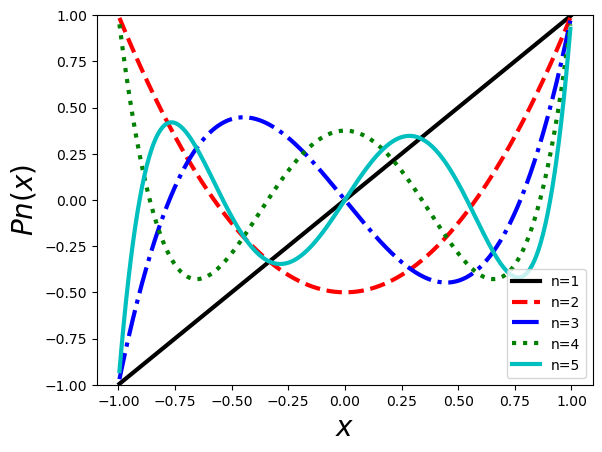

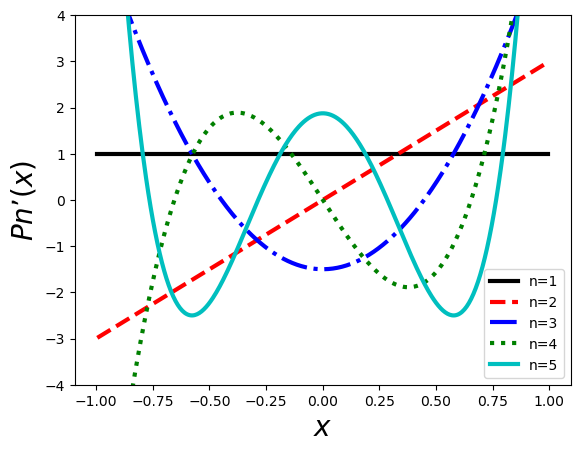

In [18]:
def legendre(n,x):
    if n==0:
        val2 = 1.
        dval2 = 0.
    elif n==1:
        val2 = x
        dval2 = 1.
    else:
        val0 = 1.; val1 = x 
        for j in range(1,n):
            val2 = ((2*j+1)*x*val1 - j*val0)/(j+1)
            val0, val1 = val1, val2 
            dval2 = n*(val0-x*val1)/(1.-x**2)
    return val2, dval2


def plotlegendre(der,nsteps): 
    mp.xlabel("$x$", fontsize=20)
    
    dertostr = {0: "$P n(x)$", 1: "$P n’(x)$"} 
    mp.ylabel(dertostr[der], fontsize=20)
    
    ntomarker = {1: "k-", 2: "r--", 3: "b-.", 4: "g:", 5: "c"} 
    xs = [i/nsteps for i in range(-nsteps+1,nsteps)]
    for n,marker in ntomarker.items():
        ys = [legendre(n,x)[der] for x in xs]
        labstr = "n={0}".format(n)
        mp.plot(xs, ys, marker, label=labstr, linewidth=3)
        
    mp.ylim(-3*der-1, 3*der+1) 
    mp.legend(loc=4) 
    mp.show()
    
    
#if __name__ == " __main__ ": 
nsteps = 200
plotlegendre(0,nsteps)
plotlegendre(1,nsteps)

In [32]:
def decomp(rs,ris):
    rmag = vecmag(rs); rimag = vecmag(ris) 
    prs = [r*ri for r,ri in zip(rs,ris)] 
    vecdot = kahansum(prs)
    costheta = vecdot/(rmag*rimag)
    return rmag, rimag, costheta


def multicoes(rs,qtopos,nmax=40):
    coes = [0. for n in range(nmax+1)] 
    for n in range(nmax+1):
        for q,pos in qtopos.items():
            rmag, rimag, costheta = decomp(rs,pos)
            val = q*(rimag**n)*legendre(n,costheta)[0] 
            coes[n] += val
    return coes


def multifullpot(rs,qtopos):
    coes = multicoes(rs,qtopos)
    rmag = vecmag(rs)
    contribs = [coe/rmag**(n+1) for n,coe in enumerate(coes)] 
    return kahansum(contribs)


#if __name__ =="main": 
qtopos = chargearray(6) 
for y in 1,-1:
    rs = [0.,y]
    potval = multifullpot(rs,qtopos); print(rs, potval)


#nmax}=40

[0.0, 1] 14.648436141512713
[0.0, -1] -0.6582543867495901


## Ejercicio 27

In [35]:
# Definimos a g como una variable simbólica
g = sym.Symbol("g")

# Definimos la función Ag que calcula la serie hasta el término m
def Ag(m):
    suma = 0
    for i in range(m + 1):
        suma+=(pow(-1/factorial(4),i)*(factorial(4*i)/(4**i*factorial(2*i)*factorial(i))))*g**i
    return suma

# Evaluamos la función Ag
Ag(3)


-0.125325520833333*g**3 + 0.0911458333333333*g**2 - 0.125*g + 1.0

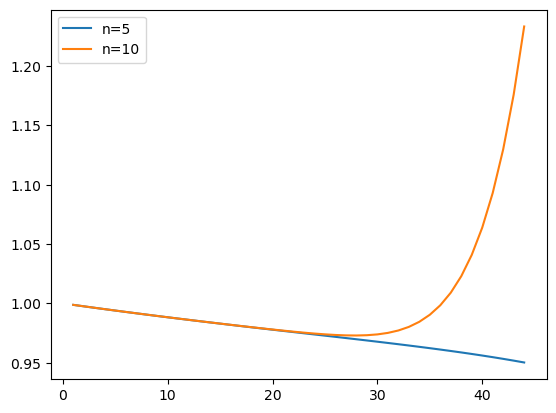

In [40]:
#Definimos Ag nuevamente, tomando valores para g
def AG(m,g):
    suma=0
    for i in range (0,m+1,1):
        suma+=(pow(-1/factorial(4),i)*(factorial(4*i)/(4**i*factorial(2*i)*factorial(i))))*g**i
    return suma

AG(2,1)

#Graficamos
g=range(1,45,1)
mp.plot(g,[AG(5,i/100) for i in g], label="n=5")
mp.plot(g,[AG(10,i/100) for i in g],label="n=10")
mp.legend()
mp.show()

In [46]:
#Definimos la función Z
def Z(g):
    Z=np.sqrt(3/(2*np.pi*g))*np.exp(3/(4*g))*sp.kv(0.25,3/(4*g))
    return Z

Z(0.01)

0.9987589917371761